In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from glob import glob
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform
import scipy

In [18]:
## Download all the text files which contain temporal ics data from melodic FSL 
fnames = glob('C:/Users/Sejal Ghate/Desktop/RAIL/time_series/t*.txt')
arrays = [np.loadtxt(f) for f in fnames]

In [20]:
arrays = np.array(arrays)
arrays = pd.DataFrame(arrays.T)

In [21]:
arrays.shape
#each column is a time series 

(1200, 424)

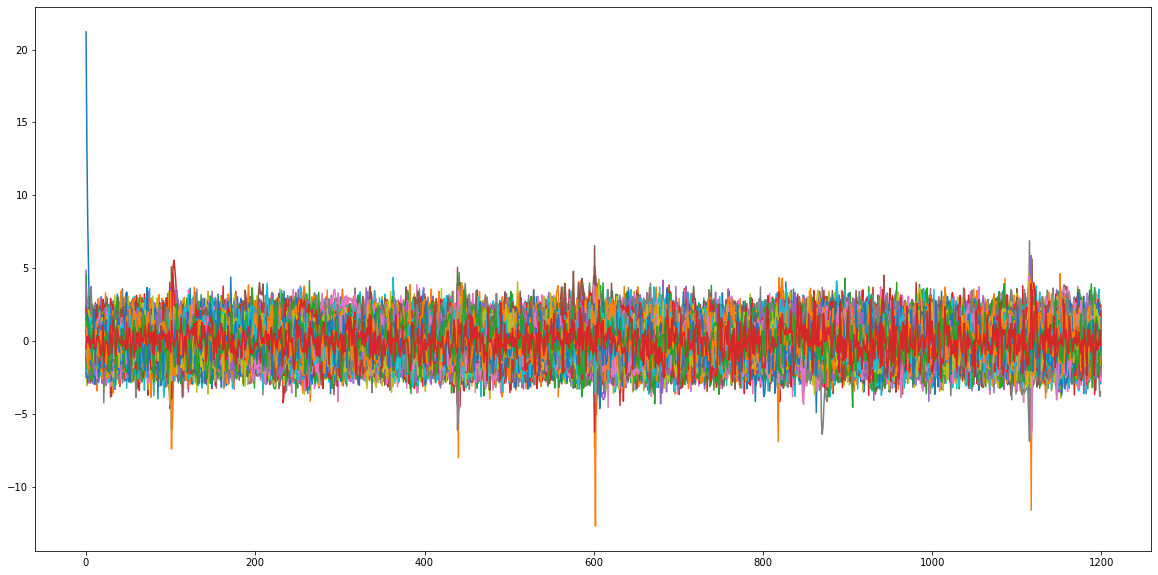

In [22]:
plt.figure(figsize=(20,10))
for i in arrays.iloc[:,:]:
        plt.plot(arrays[i])    

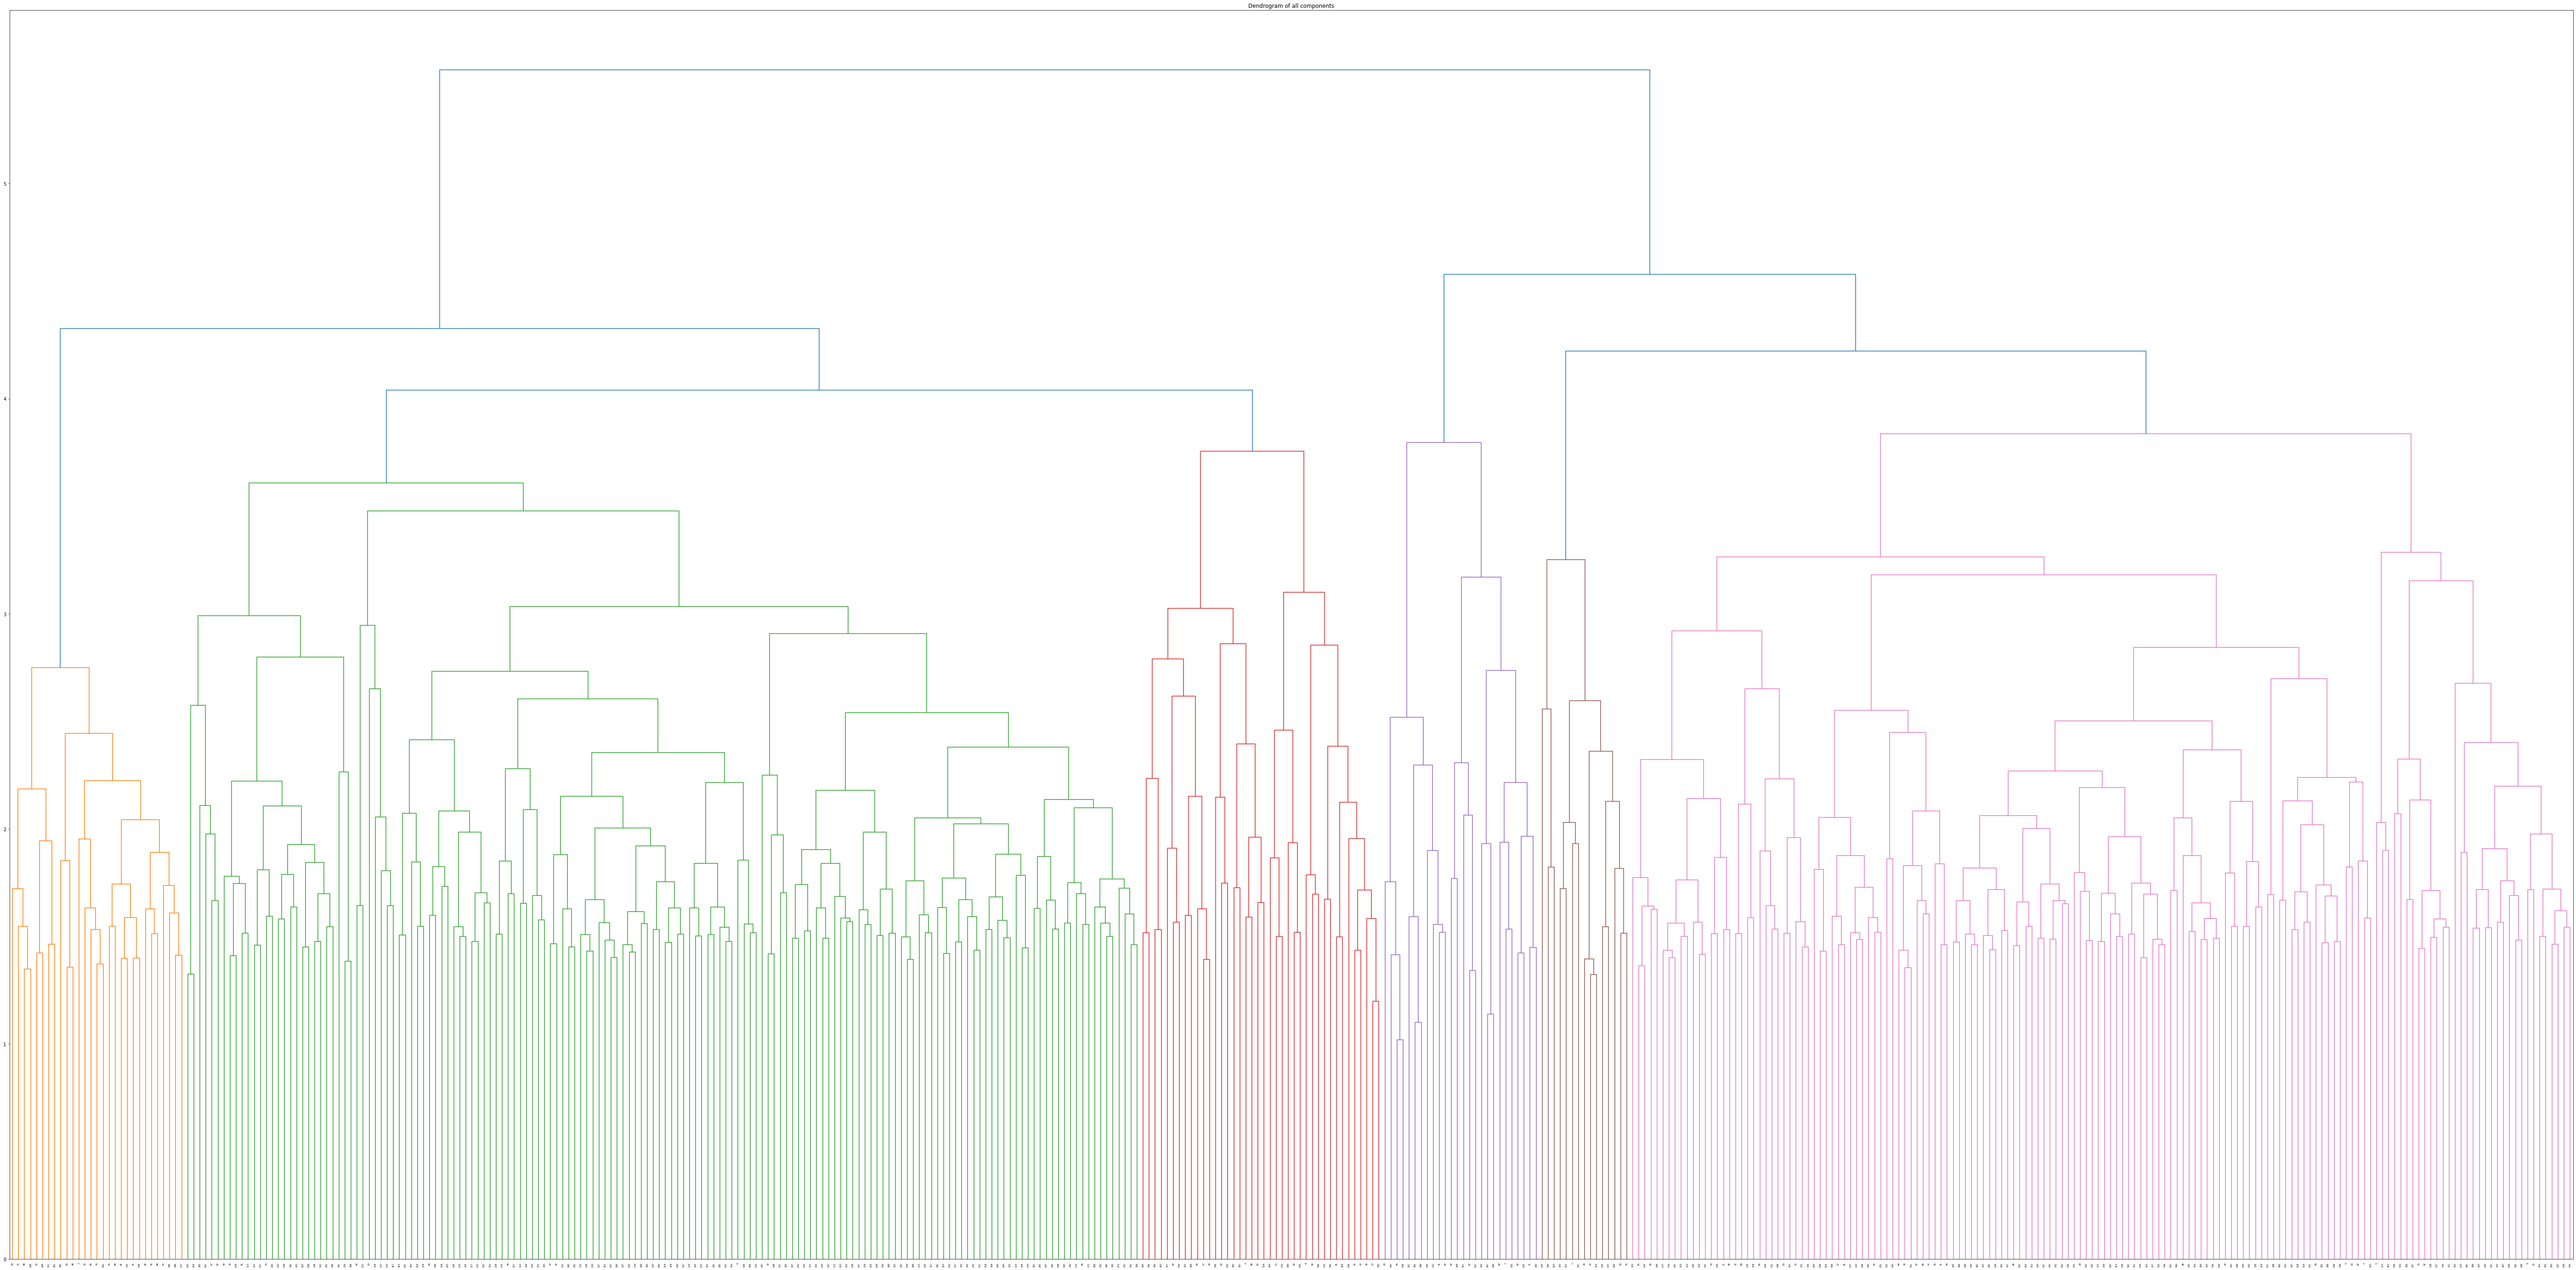

In [23]:
from scipy.spatial.distance import pdist
plt.figure(figsize=(100, 50))
plt.title("Dendrogram of all components")
corrmat = arrays.corr()
distanceMatrix = pdist(corrmat)
x = shc.linkage(distanceMatrix, method='ward', metric='euclidean')
dend = shc.dendrogram(shc.linkage(distanceMatrix, method='complete', metric='euclidean'))
plt.axhline(y=120, color='r', linestyle='--')

In [24]:
## This can be used to check for similarity  between the respective components using the brain maps.
cluster = dend['color_list']
component = dend['leaves']
x = 45 # This will give the component number at position 45, and the line below gives its corresponding cluster 
cluster[component[x]]

print(component)

[54, 72, 99, 108, 20, 408, 311, 391, 385, 19, 48, 3, 33, 86, 74, 162, 35, 69, 91, 135, 51, 238, 95, 40, 68, 70, 386, 196, 227, 100, 419, 393, 401, 57, 87, 58, 36, 109, 41, 113, 110, 137, 79, 184, 232, 308, 180, 203, 163, 168, 148, 302, 241, 296, 362, 376, 388, 93, 123, 34, 378, 127, 133, 417, 415, 421, 410, 219, 279, 84, 338, 139, 423, 226, 125, 235, 117, 270, 202, 304, 128, 175, 49, 217, 114, 149, 104, 215, 254, 25, 42, 121, 195, 291, 132, 228, 230, 157, 212, 207, 290, 257, 103, 179, 269, 285, 233, 284, 218, 328, 292, 357, 129, 255, 273, 315, 361, 185, 321, 354, 6, 106, 166, 225, 397, 32, 188, 371, 400, 197, 224, 220, 274, 155, 244, 347, 172, 213, 142, 259, 107, 276, 319, 209, 305, 268, 353, 332, 159, 286, 174, 205, 317, 181, 214, 352, 277, 343, 242, 252, 271, 318, 359, 265, 264, 325, 115, 258, 324, 261, 283, 247, 295, 348, 193, 340, 170, 94, 171, 186, 330, 280, 360, 272, 251, 331, 358, 364, 366, 384, 402, 377, 52, 379, 372, 399, 83, 17, 39, 369, 63, 200, 383, 387, 4, 98, 65, 118, 404

In [27]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')  
labels = cluster.fit_predict(corrmat)
print(labels.shape)
print(labels)

(424,)
[0 4 0 3 1 0 5 2 1 0 0 0 1 1 0 1 1 1 4 3 3 0 1 4 0 5 2 0 0 2 0 2 5 3 5 3 5
 0 1 1 3 5 5 0 0 2 0 0 3 5 0 3 1 0 3 0 1 5 5 0 0 1 2 1 0 1 0 2 3 3 3 2 3 0
 3 4 0 0 4 5 0 0 2 1 5 0 3 5 0 2 0 3 0 5 5 3 0 0 1 3 5 0 0 5 5 2 5 5 3 5 5
 0 0 5 5 5 0 5 1 0 0 5 2 5 0 5 0 5 5 5 0 0 5 5 1 3 0 5 0 5 0 0 5 0 0 2 0 0
 5 5 0 0 0 0 0 5 1 5 0 5 0 0 3 5 0 0 5 2 5 0 5 5 5 0 5 5 0 0 0 5 5 5 0 0 5
 5 5 0 5 2 2 0 0 5 0 5 3 5 0 0 1 0 5 5 0 5 0 5 0 5 0 2 5 5 5 5 0 5 5 5 5 0
 1 0 5 5 5 3 5 0 5 0 5 5 4 5 0 0 3 0 0 5 5 0 5 1 0 5 0 0 0 5 5 0 5 5 2 5 5
 5 0 5 0 0 5 5 0 2 5 5 5 5 5 5 5 0 5 5 0 5 5 0 0 5 5 5 5 0 0 2 5 5 5 0 0 5
 5 0 0 0 4 0 5 0 5 5 0 0 5 0 0 3 0 0 0 5 0 5 5 5 0 5 0 0 5 5 0 0 5 0 5 5 5
 0 2 0 0 0 5 0 5 0 0 5 0 4 0 5 5 0 0 0 5 5 5 0 0 5 5 5 5 5 5 2 1 1 1 4 1 1
 0 5 1 4 4 0 5 1 5 1 0 0 2 1 1 3 3 1 5 2 1 3 1 5 4 2 0 5 0 1 5 5 1 4 1 0 0
 0 3 4 5 2 0 4 0 5 0 5 1 5 0 5 0 5]


In [35]:
dat = arrays.T
dat['labels'] = labels + 1

In [36]:
dat.head()

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,labels
0,-0.172949,0.190972,1.916300,0.717710,1.298182,1.076539,-1.074414,-0.769045,0.883155,1.149052,...,1.044993,-2.152612,-0.157635,1.042132,1.248497,-0.202274,0.568361,1.548251,2.202961,1
1,-0.537126,-0.625790,0.025903,0.901249,0.325194,0.129497,0.425085,1.263480,0.655898,0.191509,...,0.166426,0.022758,0.061864,-0.203103,-0.239019,-0.063744,-0.359467,-0.654344,-0.441526,5
2,0.119460,2.198488,-0.530176,0.505608,0.221506,0.418417,-0.373812,-1.303564,1.726026,0.182330,...,-0.719007,-0.267185,-2.924726,0.378844,0.224054,-0.512044,2.305833,-1.120435,0.509298,1
3,0.271341,-1.606558,-0.106185,1.039005,-0.165334,0.288392,0.425659,-0.649502,-2.451378,-1.093262,...,-0.523208,1.212736,1.298684,0.612495,-1.045872,-0.666613,0.230931,2.126387,0.350518,4
4,0.051400,-0.639401,0.547537,-1.934593,0.362657,0.203741,-0.223892,0.018638,-1.259960,-0.600829,...,1.337013,0.599852,0.756040,-0.057127,-0.407627,0.869364,-0.108248,-0.685730,-1.080575,2


In [55]:
df = dat
df['number'] = df.index + 1
df.head()

namespace = globals()
for x in range(1, 6):
    namespace['df_%d' % x] = df[df['labels'] == x]

In [56]:
df_6.head()

,0,1,2,3,4,5,6,7,8,9,...,1192,1193,1194,1195,1196,1197,1198,1199,labels,number
6,0.848992,1.641872,1.912928,1.734402,1.769979,-0.414098,0.013899,-1.525232,-1.505151,0.038995,...,0.046414,0.428626,1.230154,-0.353169,0.978077,0.743310,2.151851,-0.474051,6,7
25,-0.553575,0.744067,2.416982,1.774461,0.182510,1.591758,1.393077,0.527870,0.211514,-0.315445,...,1.625960,1.129560,0.814029,1.097950,-0.567593,0.740501,1.387859,0.604561,6,26
32,2.277462,0.140119,0.725506,0.208732,-0.780113,0.371447,0.888802,0.527735,-1.513728,-1.194773,...,-0.478100,0.592799,-0.410788,-0.114397,-0.034332,0.501838,-1.011425,0.572900,6,33
34,-0.457462,-0.003655,1.233779,1.093653,1.213029,1.151566,0.782485,-0.279667,-1.312081,-1.542448,...,0.095611,0.159497,-0.657605,-1.478136,-0.365798,0.705106,1.843873,1.609357,6,35
36,-0.035300,1.935382,1.373839,1.872427,-0.567436,-0.613839,0.507307,0.303636,-0.166903,-0.402727,...,0.015501,-0.373906,0.127942,0.970456,0.329122,1.715985,-0.950754,-0.198421,6,37


In [74]:
namespace = globals()
for x in range(1, 7):
    namespace['label_%d' % x] = list(eval('df_'+str(x))['number'])

label_3 = list(df_3['number'])

In [78]:
label_3

[8,
 27,
 30,
 32,
 46,
 63,
 68,
 72,
 83,
 90,
 106,
 123,
 146,
 168,
 190,
 191,
 212,
 257,
 268,
 290,
 335,
 364,
 383,
 390,
 396,
 412]

In [79]:
# Access sptial ics maps and check with Dr. Sair
# to compare if these actually belong to the same cluster and verify using sptial ica maps

import csv


with open('file.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(label_1)
    writer.writerow(label_2)
    writer.writerow(label_3)
    writer.writerow(label_4)
    writer.writerow(label_5)
    writer.writerow(label_6)